In [ ]:
# STEP 1: Install mlxtend (only needed once in Colab)
!pip install mlxtend


In [ ]:
# STEP 2: Import required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# STEP 3: Upload the dataset
from google.colab import files
uploaded = files.upload()


Saving sample_transactions.csv to sample_transactions.csv


In [ ]:
# STEP 4: Load the dataset
df = pd.read_csv("sample_transactions.csv")
df.head()


,TransactionID,Item
0,1,Butter
1,1,Milk
2,1,Apples
3,2,Butter
4,2,Bread


In [ ]:
# STEP 5: Transform data to basket format
basket = df.groupby(['TransactionID', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('TransactionID')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()


<ipython-input-11-d7d6ae4cf552>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Apples,Bananas,Beef,Bread,Butter,Cheese,Chicken,Eggs,Milk,Rice
TransactionID,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0
3,0,0,1,0,1,1,0,0,1,0
4,1,0,0,1,0,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,1


In [ ]:
# STEP 6: Generate frequent itemsets using Apriori
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False).head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.40,(Chicken)
3,0.38,(Bread)
2,0.37,(Beef)
4,0.36,(Butter)
0,0.36,(Apples)


In [ ]:
# STEP 7: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
29,"(Butter, Bananas)",(Apples),0.05,0.714286,1.984127
35,"(Milk, Bananas)",(Apples),0.05,0.625000,1.736111
80,"(Eggs, Bananas)",(Beef),0.05,0.625000,1.689189
90,"(Eggs, Milk)",(Beef),0.05,0.555556,1.501502
127,"(Eggs, Milk)",(Chicken),0.05,0.555556,1.388889
40,"(Beef, Cheese)",(Apples),0.06,0.545455,1.515152
42,"(Cheese, Apples)",(Beef),0.06,0.545455,1.474201
54,"(Bread, Milk)",(Apples),0.07,0.538462,1.495726
73,"(Apples, Rice)",(Milk),0.07,0.538462,1.583710
110,"(Bread, Milk)",(Chicken),0.07,0.538462,1.346154


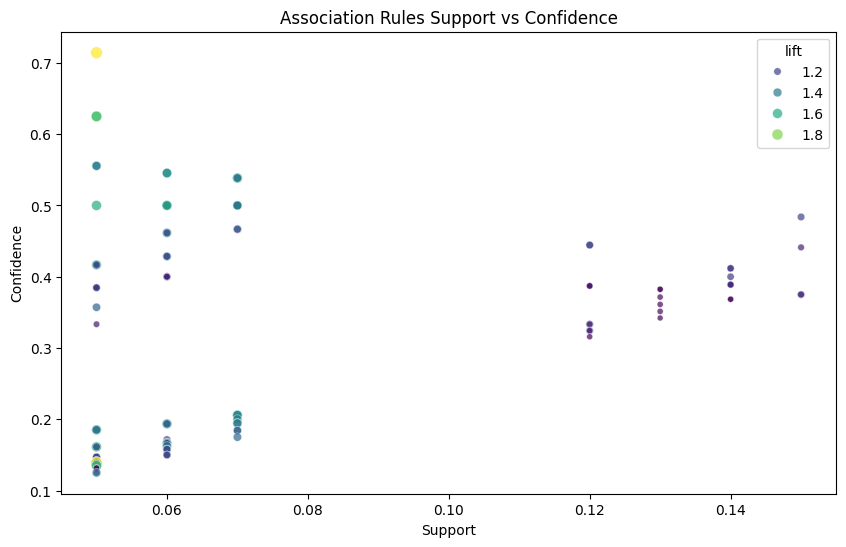

In [ ]:
# STEP 8: Visualize rules with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", alpha=0.7, palette="viridis")
plt.title('Association Rules Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


In [ ]:
# STEP 9: Save results to CSV
rules.to_csv("association_rules_output.csv", index=False)
print("Rules exported to association_rules_output.csv")


Rules exported to association_rules_output.csv
